In [1]:
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4791,4792,15746461,Taylor,709,Spain,Male,35,2,0.00,2,1,0,104982.39,0
8797,8798,15630466,Maclean,797,France,Male,45,8,0.00,1,0,0,125110.02,0
1304,1305,15749004,Tsao,718,France,Female,31,0,118100.59,2,1,0,103165.15,0


In [9]:
df.fillna('scalar')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
df.loc[:, 'Surname'].value_counts()

,count
Surname,
Smith,32
Scott,29
Martin,29
Walker,28
Brown,26
...,...
Hull,1
Sturdee,1
Flannagan,1


In [19]:
X = np.linspace(0, 10, 1000)
y = np.cumsum(np.random.randn(1000, 6), 0)

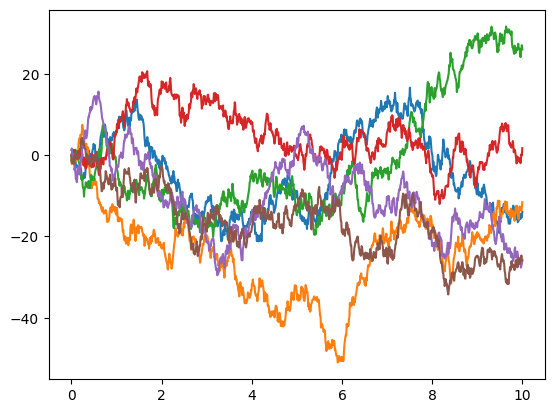

In [20]:
plt.plot(X, y)
plt.show()

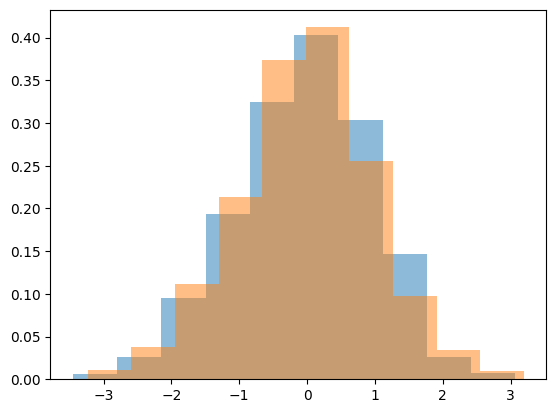

In [22]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

for dataset in 'ab':
  plt.hist(df[dataset], density=True, alpha=0.5)
plt.show()

/tmp/ipython-input-30-2761793329.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[dataset], shade=True)
/tmp/ipython-input-30-2761793329.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[dataset], shade=True)


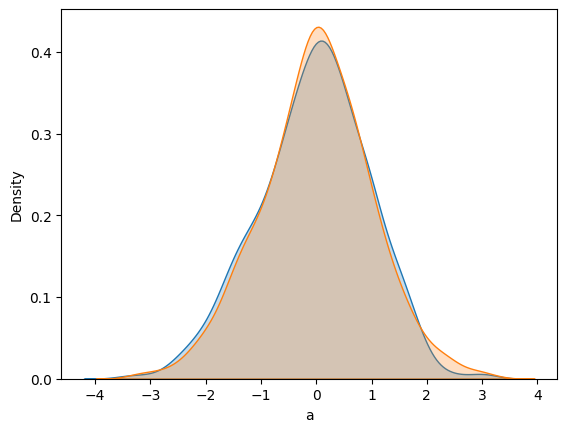

In [30]:
for dataset in 'ab':
    sns.kdeplot(df[dataset], shade=True)
plt.show()

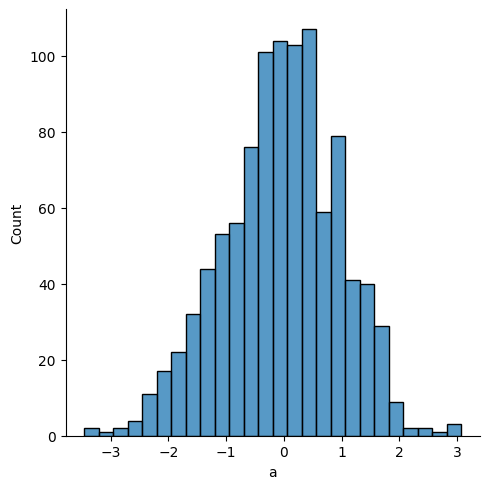

In [31]:
sns.displot(df['a'])

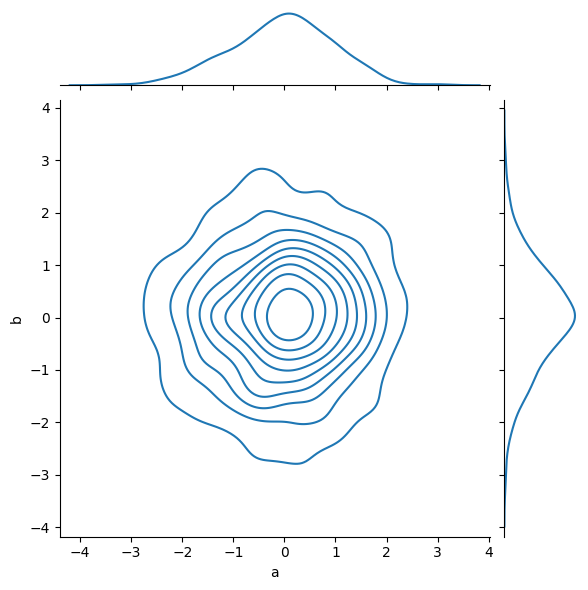

In [33]:
sns.jointplot(x='a', y='b', data=df, kind='kde')
plt.show()

In [11]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df1 = df

In [ ]:
df.drop(['RowNumber', 'CustomerId'], axis=1, inplace=True)

In [ ]:
df1.drop('Surname', axis=1, inplace=True)

In [ ]:
X = df1.drop('Exited', axis = 1)
y = df1['Exited'].copy()

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())

])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy= 'constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown= 'ignore'))
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
], remainder = 'passthrough')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder

In [ ]:
X_train_transformed = transformer.transform(X_train)
rfr.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [ ]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Geography', 'Gender'], dtype='object'))])

In [ ]:
X_train_transformed_df = pd.DataFrame(data = transformer.transform(X_train), columns = transformer.get_feature_names_out())
X_test_transformed_df = pd.DataFrame(data = transformer.transform(X_test), columns = transformer.get_feature_names_out())

#RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train_transformed_df, y_train)

RandomForestClassifier()

In [ ]:
rfc.score(X_train_transformed_df, y_train), rfc.score(X_test_transformed_df, y_test)

(1.0, 0.8685)

Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

clf_rf = Pipeline(steps=[
    ('preprocessor', transformer),  # Preprocessing mərhələsi
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [ ]:
clf_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Geography', 'Gender'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred_rf = clf_rf.predict(X_test)

In [ ]:
X_test.shape

(2000, 10)

In [ ]:
accuracy_score(y_test, y_pred_rf)

0.8675

#LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf_logistic = Pipeline(steps=[
    ('transformer', transformer),
    ('classifier', LogisticRegression(random_state=42, max_iter = 1000))
])

In [ ]:
clf_logistic.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Geography', 'Gender'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
X_train_clf_pred = clf_logistic.predict(X_train)
X_test_clf_pred = clf_logistic.predict(X_test)

In [ ]:
accuracy_score(X_train_clf_pred, y_train)

0.80875

In [ ]:
accuracy_score(X_test_clf_pred, y_test)

0.811

#Recall Precision F1 Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

train ucun

In [ ]:
train_precision = precision_score(y_train, X_train_clf_pred)
train_precision

0.5873287671232876

In [ ]:
train_recall = precision_score(y_train, X_train_clf_pred)
train_recall

0.5873287671232876

In [ ]:
train_f1score = f1_score(y_train, X_train_clf_pred)
train_f1score

0.3095667870036101

test ucun

In [ ]:
test_precision = precision_score(y_test, X_test_clf_pred)
test_precision

0.5818181818181818

In [ ]:
test_recall = recall_score(y_test, X_test_clf_pred)
test_recall

0.23703703703703705

In [ ]:
test_f1 = f1_score(y_test, X_test_clf_pred)
test_f1

0.3368421052631579

#Imbalance

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['Geography'] = le.fit_transform(X_train['Geography'])
X_train['Gender'] = le.fit_transform(X_train['Gender'])

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037
